In [86]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [93]:
df = pd.read_csv('../data/cleaned_data_without_location_and_color.csv')

In [94]:
df.shape

(3900, 30)

In [95]:
# Applying PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(df)

In [97]:
principal_components

array([[ 1.75933206,  0.71068515,  0.9260083 , ...,  0.11056914,
        -0.300185  ,  0.26149428],
       [ 1.76517389,  0.71267468,  0.90820433, ..., -0.54774577,
        -0.3548033 ,  0.05347084],
       [ 2.7618608 , -1.30688971,  0.85714432, ...,  0.06878278,
         0.04237429,  0.1849361 ],
       ...,
       [-1.24804734,  0.67634008, -0.75289636, ...,  0.19731318,
        -0.3552661 , -0.00417241],
       [ 2.76091184, -1.30055605, -0.79823781, ..., -0.07242692,
         0.1109599 ,  0.07973301],
       [-1.24878301, -0.35637612, -0.75794187, ...,  0.20971673,
         0.28151194,  0.15926605]])

In [99]:
# Extracting PCA Loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame for loadings
df_loadings = pd.DataFrame(loadings, index=df.columns)

# Calculate the contribution of each feature to each principal component
contributions = (df_loadings ** 2) / np.sum(df_loadings ** 2, axis=0)
contributions

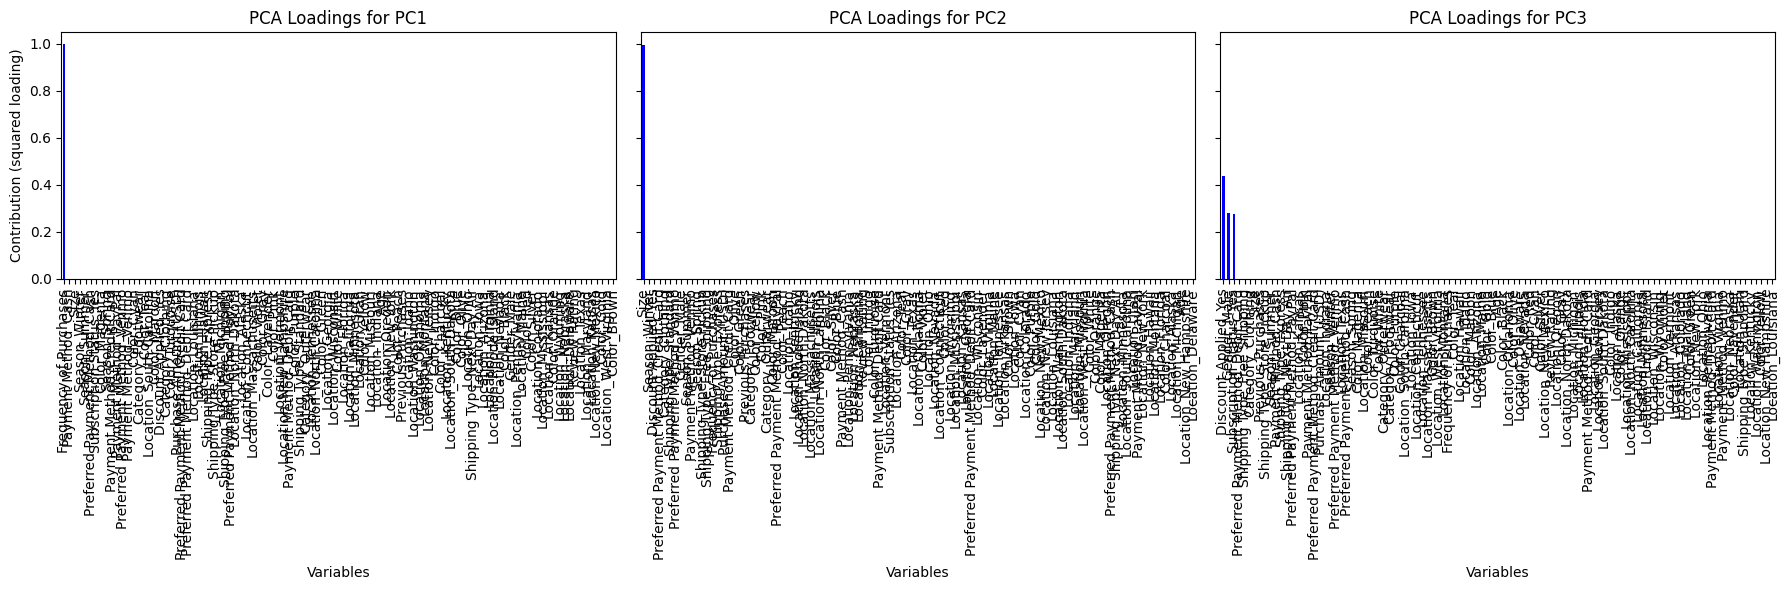

In [80]:
def contribution_of_variables(df_loadings, components):
    fig, axes = plt.subplots(1, len(components), figsize=(18, 6), sharey=True)

    for i, component in enumerate(components):

        df_loadings[component].sort_values(ascending=False).plot(kind='bar', ax=axes[i], color='blue')
        axes[i].set_title(f'PCA Loadings for {component}')
        axes[i].set_xticklabels(df_loadings[component].sort_values(ascending=False).index, rotation=90)
        axes[i].set_xlabel('Variables')
        # axes[i].tick_params(axis='x', rotation=45)
        if i == 0:
            axes[i].set_ylabel('Contribution (squared loading)')

    plt.tight_layout()
    plt.show()

contribution_of_variables(contributions, ['PC1', 'PC2', 'PC3'])

In [81]:
# Create a DataFrame with principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

In [100]:
df_pca = pd.DataFrame(data=principal_components)
df_pca

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.759332,0.710685,0.926008,-0.713813,-0.501379,-0.509988,0.466611,0.426645,-0.140589,-0.459576,...,0.658237,0.690026,-0.333170,0.531937,-0.319241,-0.242397,-0.059007,0.110569,-0.300185,0.261494
1,1.765174,0.712675,0.908204,-0.713750,-0.478743,-0.468021,0.113098,-0.101986,-0.432779,-0.054290,...,0.748093,-0.099215,-0.118349,0.433921,0.091600,-0.359875,-0.038982,-0.547746,-0.354803,0.053471
2,2.761861,-1.306890,0.857144,-0.613284,0.765267,-0.019895,-0.429488,-0.272914,-0.817656,0.523000,...,-0.558387,0.349308,0.062182,0.246837,-0.085259,-0.185320,-0.047131,0.068783,0.042374,0.184936
3,2.770948,-0.329447,0.922774,0.684311,0.695214,-0.354539,-0.118284,0.339408,0.521206,0.808641,...,-0.445959,-0.237154,0.579093,0.089606,-0.260210,-0.465452,-0.580277,-0.073449,0.523278,-0.319238
4,-2.249272,-0.369030,0.904185,-0.533315,0.768926,-0.098132,0.117055,0.446917,-0.894335,0.993960,...,-0.566975,0.244807,-0.036701,-0.210957,0.024959,-0.209806,-0.011536,0.247406,-0.138694,-0.018032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,2.724000,0.706219,-0.766235,-0.327035,-0.281134,0.926209,-0.161750,-0.261555,-0.413896,0.134923,...,-0.233638,0.914223,-0.576435,0.023095,-0.045044,-0.248959,0.033367,0.110021,-0.157310,-0.386673
3896,0.750654,0.677998,-0.756787,0.376069,0.821046,-0.137176,0.182753,-0.392299,0.245539,0.093434,...,-0.384941,-0.701248,-0.383439,0.101419,-0.446008,-0.292448,0.315832,0.263626,0.201882,-0.237710
3897,-1.248047,0.676340,-0.752896,0.293151,0.776739,-0.160853,0.569780,-0.039851,0.278763,-0.663843,...,0.223454,0.687032,0.060599,-0.116511,-0.562249,-0.182313,0.283520,0.197313,-0.355266,-0.004172
3898,2.760912,-1.300556,-0.798238,0.906377,-0.304971,0.622623,-0.188625,0.113625,0.180077,0.141878,...,0.556025,0.130386,-0.596565,0.907130,-0.509374,-0.400729,-0.523957,-0.072427,0.110960,0.079733


In [101]:
df_pca.to_csv('../data/pca_one_hot_encode_data_without_location_and_color.csv', index=False)